# Notebook 6: Diseño de Base de Datos Relacional vs. Diseño de Base de Datos "NoSQL" - Normalización vs. Flexibilidad

## 1. Documento estructurado

En muchos sitios web o libros aún se utiliza el acrónimo "NoSQL" ("No SQL") o "NOSQL" ("Note only SQL"). En realidad, estos acrónimos se refieren a Sistema de Gestión de Base de Datos:

- que no utilizan <b>el modelo relacional</b>,
- que a menudo tienen las características de un <b>sistema distribuido</b> (escalamiento horizontal).

Dentro de los SGBD "NoSQL", diferenciamos varias subfamilias de SGBD. Entre ellas se encuentran los SGBD orientados al almacenamiento de objetos JSON, llamados SGBD orientados a <b>Documentos</b> (por ejemplo: Mongo).

Un documento es un conjunto de claves y valores. Por ejemplo:

<code> {nombre: "Juan", edad: 18}</code>

Las claves corresponden a la estructura del documento. Hablamos de <b>documento estructurado</b>.


## 2. Objetivos de los SGBDs orientados a Documentos

- <b>Flexibilidad</b>: la estructura debe poder adaptarse a variaciones más o menos importantes. Por ejemplo: 

<code> {nombre: "Maria", edad: 29, email: "maria@gmail.com", profesion: "Data Scientist"} </code>

- <b>Riqueza de la estructura</b>: la estructura debe poder permitir arreglos, listas y objetos añadidos dentro de otros.

<code> {nombre: "Esteban", edad: 14, hobbies:[{actividad: "deporte", tiempo: 3}, {actividad:"video juego", tiempo:20}]}</code>
    
- <b>Autonomía</b>: Toda la información útil (estructura y datos) está representada en el objeto.

Estos objetivos son muy distintos de los objetivos de los SGBDs relacionales.

<b>Pregunta:</b>
¿Cuáles son los objetivos de los SGBDs relacionales?

1- Asegurar la <b>coherencia de los datos</b>

2- <b>Evitar redundancia</b> en los datos

3- Ofrecer un mecanismo de <b>Transacción ACID</b> (Átomicidad, Consistencia, aIslamiento, Durabilidad)
    
4- <b>Independencia del modelo de datos</b> con consideraciones de la aplicación o del almacenamiento físico


## 3. Sintáxis JSON

JSON es el formato utilizado por la gran mayoría de los SGBDs orientados a Documentos como Mongo, CouchDB o RethinkDB. Pueden referirse a sitio web como http://www.json.org/ para más detalles sobre el formato JSON pero a continuación se recuerda algunos aspectos.

Los valores de una clave pueden ser <b>atómicos</b> (Cadena de caracteres, número o booleano):

- <code>"title": "The Social network"</code>
- <code>"year": 2010</code>
- <code>"oscar": false</code>

o pueden ser <b>valores complejos</b> (objeto añadido o lista):

- <code>"director": {firstname:"David", lastname:"Fincher"}</code>
- <code>"actors": ["Eisenberg","Mara","Garfield","Timberlake"]</code>
- <code>"mixed": ["Eisenberg", 1948, true, {nombre:"juan", edad:18}]</code>

<b>Ejercicio:</b> El documento siguiente contiene (muchos) errores. Traten de corregirla manualmente y luego validar con un corrector de JSON tipo https://jsonlint.com/.

<code>
{
"title": "Taxi driver",
"year": 1976,
"genre": "drama",
"country": "USA",
"director":
{
"last_name": "Scorcese",
first_name: "Martin",
"birth_date": "1962"
},
"actors": [
{
first_name: "Jodie",
"last_name": "Foster",
"birth_date": null,
"role": "1962"
}
{
first_name: "Robert",
"last_name": "De Niro",
"birth_date": "1943",
"role": "Travis Bickle ",
}
}
</code>

<b>Solucion Ejercicio:</b> 


<code>

{
	"title": "Taxi driver",
	"year": 1976,
	"genre": "drama",
	"country": "USA",
	"director": {
		"last_name": "Scorcese",
		"first_name": "Martin",
		"birth_date": "1962"
	},
	"actors": [{
			"first_name": "Jodie",
			"last_name": "Foster",
			"birth_date": null,
			"role": "1962"

		},
		{
			"first_name": "Robert",
			"last_name": "De Niro",
			"birth_date": "1943",
			"role": "Travis Bickle "
		}
	]
}
</code>

Ejemplo de documento de una colección de "Peliculas":

<code>
{
    "title": "Pulp fiction",
    "year": "1994",
    "genre": "Action",
    "country": "USA",
    "director": {
        "last_name": "Tarantino",
        "first_name": "Quentin",
        "birth_date": "1963" },
    "actors": [
        {"first_name": "John","last_name": "Travolta","birth_date": "1954","role": "Vincent Vega" },
        {"first_name": "Bruce","last_name": "Willis","birth_date": "1955","role": "Butch Coolidge" },
        {"first_name": "Quentin","last_name": "Tarantino","birth_date": "1963","role": "Jimmy Dimmick"}
    ]
}
</code>

## 4. Normalización vs. Flexibilidad

Modelar una Base de Datos en el contexto de un SGBD relacional sigue una metodología bien establecida para asegurar la coherencia (hablamos de <b>normalización</b>) del modelo relacional. No es el caso para los SGBD NoSQL

<b>Preguntas:</b>¿De qué hablamos exactamente cuando hablamos de <b>normalización</b> de una base de datos relacional?
¿Cuáles son las características del modelo relacional?

La normalización de bases de datos es un proceso que consiste en designar y aplicar una serie de reglas a las relaciones obtenidas tras el paso del modelo entidad-relación al modelo relacional.

Las bases de datos relacionales se normalizan para:

    Evitar la redundancia de los datos.
    Disminuir problemas de actualización de los datos en las tablas.
    Proteger la integridad de datos.
    
    

En resumen, las características de un modelo relacional son:
- Un objetivo de normalización que pretende evitar tanto la redundancia como la pérdida de información. La redundancia se evita cortando los datos con granularidad fina y almacenándolos de forma independiente. Se evita la pérdida de información utilizando un sistema de referencia basado en claves primarias y clave foranera.
- Los datos están limitados por un esquema que impone reglas sobre el contenido de la base de datos.
- No hay jerarquía en la representación de las entidades.
- La distribución de los datos en varias tablas se compensa con la capacidad de SQL para realizar operaciones de JOIN.

¿Qué son las formas normales?: https://es.wikipedia.org/wiki/Forma_normal_(base_de_datos)

# 5. Ventajas y Desventajas de los documentos

Ventajas:
- <b>No más necesidad de JOIN</b>: es inútil hacer JOIN para reconstruir la información ya que no está dispersa en varias tablas, como en relacional.
- <b>No más necesidad de transacciones (?)</b>: una escritura (del documento) es suficiente para crear todos los datos. Del mismo modo, una operación de lectura es suficiente para recuperar toda la información.
- <b>Adaptación a la distribución</b>. Si los documentos son independientes, simplifica la gestión de los datos distribuidos.

Desventajas:
- <b>Jerarquía de acceso</b>: la representación de películas y artistas no es simétrica. Los artistas son enterrados en las profundidades. El acceso a las películas esta privilegiado (no se puede acceder a los artistas sin pasar por ellos), lo que puede o no ser apropiado para la aplicación.
- <b>Pérdida de autonomía de las entidades</b>. Ya no es posible representar información sobre un director.
si no conocemos al menos una película; por el contrario, al eliminar una película (por ejemplo, Pulp Fiction), corremos el riesgo de eliminar permanentemente los datos de un artista (por ejemplo, Tarantino).</b>
- <b>Redundancia / no control sobre los datos</b>: la misma información debe ser representada varias veces, lo que es bastante desafortunado. Quentin
Tarantino está representado dos veces, y de hecho estará representado tantas veces como haya hecho películas (o hecho
el actor en alguna parte).

<b>Una colección Mongo puede rapidamente transformarse en una basura de datos inutilizables.</b>

En conclusión: <i>¿Relacional o NoSQL?</i>
- Los <b>sistemas Relacionales son más potentes</b> en término de funcionalidades, pero los <b>sistemas NoSQL pueden ser útiles en <u>ciertas</u> situaciones</b>.
- Lo que un sistema NoSQL no hace (cuidar la integridad de los datos, operaciones compleja que implican JOIN, transacciones, etc.), debe estar respaldado por la aplicación.

¿Cuándo utilizar NoSQL?

- <b> Datos muy específicos, sin o con poca estructura</b>: series de tiempo, datos textuales.
- <b> Baja necesidad de actualizar los datos, solamente operaciones de lectura</b>: ejemplo de aplicaciones orientadas a "Analytics", acumular datos para luego calcular estadisticas (ver: Data Science).
- <b> Volumenes de datos realmente grandes</b>: si operaciones de JOIN costosas, se puede asumir la denormalización y los riesgos que eso implica 


# 6. Ejercicios

1. ¿Cómo se podría transformar el documento JSON siguiente en un modelo relacional que respeta al menos las 3 primeras formas normales?

<code>
 {
 "created_at":"Thu Apr 06 15:24:15 +0000 2017",
 "id": 850006245121695744,
 "text": "1/ Today we’re sharing our vision for the future of the Twitter API platform!nhttps://t.co/XweGngmxlP",
 "user": {
    "id": 2244994945,
    "name": "TwitterDev",
    "screen_name": "TwitterDev",
    "description": "Your source for Twitter news",
    "verified": true,
    "followers_count": 477684,
    "friends_count": 1524,
    "listed_count": 1184,
    "favourites_count": 2151,
    "statuses_count": 3121,
    "created_at": "Sat Dec 14 04:35:55 +0000 2013",
    "profile_image_url_https": "https://pbs.twimg.com/"
    },  
 "entities": {
    "urls": [
    {
      "indices": [
        32,
        52
      ],
      "url": "http://t.co/IOwBrTZR",
      "display_url": "youtube.com/watch?v=oHg5SJ…",
      "expanded_url": "http://www.youtube.com/watch?v=oHg5SJYRHA0"
    }
   ],
    "user_mentions": [
    {
      "name": "Twitter API",
      "indices": [
        4,
        15
      ],
      "screen_name": "twitterapi",
      "id": 6253282,
      "id_str": "6253282"
    }
  ]
 }
}
</code>


2. Usted administra un sitio de comercio electrónico y espera decenas de millones de usuarios (o más). Preguntándose qué base de datos usar: ¿relacional o NoSQL?

Las siguientes dos tablas representan el modelo relacional para los usuarios y las visitas a la página (que
que usted registra, por supuesto, para analizar el comportamiento de sus usuarios).

<u>Usuarios</u>:
<table>
  <tr>
      <td><b>id</b></td>
      <td><b>nombre</b></td>
      <td><b>email</b></td>
  </tr>
  <tr>
    <td>1</td>
    <td>juan</td>
    <td>juan@uach.cl</td>
  </tr>
  <tr>
    <td>2</td>
    <td>maría</td>
    <td>maria@uach.cl</td>
  </tr>
  <tr>
    <td>...</td>
    <td>...</td>
    <td>...</td>
  </tr>
</table>

<u>Visitas</u>:
<table>
  <tr>
      <td><b>idUtil</b></td>
      <td><b>página</b></td>
      <td><b>nbVisitas</b></td>
  </tr>
  <tr>
    <td>1</td>
    <td>A</td>
    <td>4</td>
  </tr>
  <tr>
    <td>1</td>
    <td>B</td>
    <td>2</td>
  </tr>
  <tr>
    <td>2</td>
    <td>B</td>
    <td>6</td>
  </tr>
</table>

a) Proponer una representación de esta información en forma de documento estructurado
- favoreciendo el acceso de los usuarios,
- dando prioridad al acceso a través de las páginas visitadas.

b) Proponer un modelo relacional, y modelo en forma de documento estructurado, para representar en la base de datos
la lista de productos adquiridos por un usuario.

a)
<code>
{
    "tienda":"HenryStore",
    "usuario":[{
        "id": 1,
        "nombre":"Juan",
        "email": "juan@uach.cl"
    },{
        "id": 2,
        "nombre":"Maria",
        "email": "maria@uach.cl"
    }],
    "paginas":[{
        "id":1,
        "pagina":"A",
        "nbVisitas":4
    },
    {
        "id":1,
        "pagina": "B",
        "nbVisitas":2
    },
    {
        "id":2,
        "pagina": "B",
        "nbVisitas":6       
    }]
    
}
</code>

b) modelo relacional

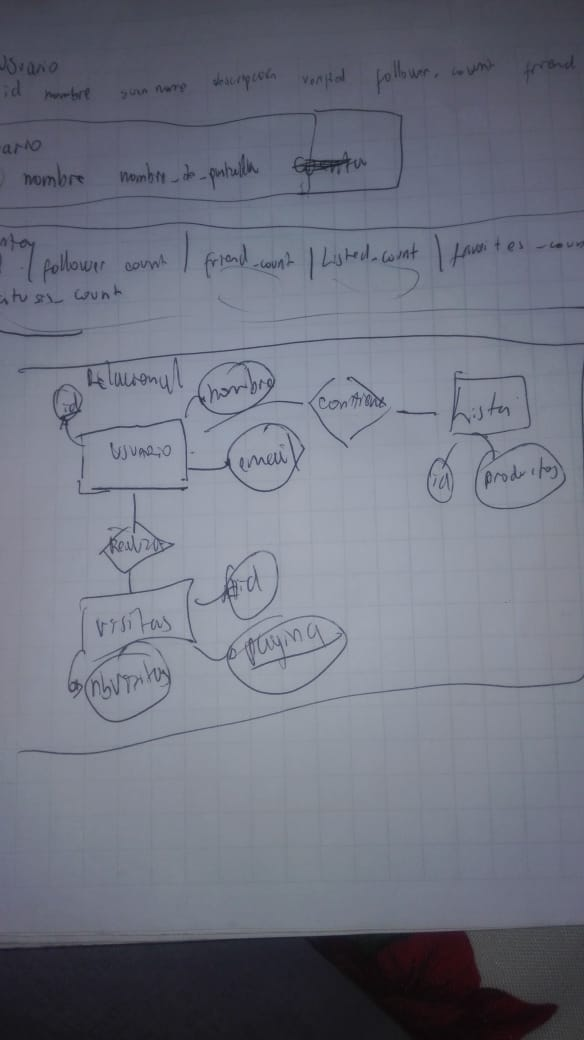 

In [ ]:
#b) NoSql

{
    "tienda":"HenryStore",
    "usuario":[{
        "id": 1,
        "nombre":"Juan",
        "email": "juan@uach.cl"
    },{
        "id": 2,
        "nombre":"Maria",
        "email": "maria@uach.cl"
    }],
    "paginas":[{
        "id":1,
        "pagina":"A",
        "nbVisitas":4
    },
    {
        "id":1,
        "pagina": "B",
        "nbVisitas":2
    },
    {
        "id":2,
        "pagina": "B",
        "nbVisitas":6
    }]
    "lista":[{
        "id":1,
        "producto": "notebook"
    },
        {
        "id": 2,
        "producto":"mause"
            
        }
    ]
}
